#Installaing important Libraries

1. **pip install torch torchvision transformers** - Installs PyTorch, a popular library for deep learning, along with torchvision for processing images and transformers for working with pre-trained transformer models like BERT or GPT.


2. **pip install fuzzywuzzy** - Installs FuzzyWuzzy, a Python library used for string matching. It can find similarities between strings, which is useful in tasks like typo correction or matching names in datasets.

3. **!pip install python-Levenshtein** - Installs the Python-Levenshtein library, which is an efficient implementation of the Levenshtein distance. It measures the difference between two sequences of characters (i.e., how many single-character edits are required to change one word into the other). This library is often used to enhance the performance of FuzzyWuzzy by speeding up its string comparison operations.

In [1]:
!pip install torch torchvision transformers
!pip install fuzzywuzzy
!pip install python-Levenshtein


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

#Importing important libraries:

1. Imports data manipulation library pandas and json for handling JSON data.

2. Utilizes PyTorch for building deep learning models, with modules for neural networks (nn), optimizers (Adam), and data handling (DataLoader).

3. Incorporates torchvision for image processing and data transformations.

4. Sets up transformers for using pre-trained models like DistilBert for sequence classification, and configures logging to only display errors.

5. Uses fuzzywuzzy for string matching and sklearn for splitting datasets into training and testing sets.

6. Defines a PyTorch dataset class (Dataset).

7. Checks and sets the device to GPU if available, otherwise to CPU, optimizing computational efficiency.

In [2]:
import pandas as pd
import json


import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import logging
from fuzzywuzzy import process
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

from transformers import DistilBertTokenizer
from torch.utils.data import DataLoader
from torch.optim import Adam

logging.set_verbosity_error()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Teacher Model

1. **DistilBertForSequenceClassification.from_pretrained** loads the DistilBert model, a lighter version of BERT designed for faster processing with less resource consumption.The model is specifically loaded with the 'distilbert-base-uncased' configuration, which uses lowercase text.

2. **Output_hidden_states=True** ensures that the model outputs hidden states from all layers, which are useful for advanced analysis or custom model architectures.

3. **teacher_model.to(device)** moves the model to the appropriate device (CPU or GPU) for computation.

**BERT (Bidirectional Encoder Representations from Transformers)** is a groundbreaking model in natural language processing developed by Google. It's designed to pre-train deep bidirectional representations by conditioning on both left and right context in all layers, leading to state-of-the-art performances on a wide range of NLP tasks.








In [3]:
#Load pre-trained DistilBert as the teacher model
teacher_model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    output_hidden_states=True
)
teacher_model.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

#Initializing Student Model

1. **Class Definition:** StudentModel inherits from nn.Module. It's defined with an input layer, a hidden layer, and an output layer.

2. **Initialization:** Inside the constructor (__init__), the model initializes two fully connected (nn.Linear) layers—fc1 connects the input size to the hidden size, and fc2 connects the hidden size to the number of classes. A ReLU activation (nn.ReLU) is used between these layers to introduce non-linearity.

3. **Forward Pass:** The forward method defines the data flow through the network—data x is passed through fc1, activated by ReLU, and then passed through fc2 to produce the final output.

4. **Model Instantiation:** A StudentModel instance is created with specific dimensions tailored for BERT embeddings (768 input features), reduced complexity in the hidden layer (256 units), and configured for binary classification (2 classes). It is moved to an appropriate device (CPU or GPU) for computation.

In [4]:

class StudentModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(StudentModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define student model
# For BERT, this is the size of the hidden state

input_size = 768

# Smaller hidden size to reduce complexity
hidden_size = 256

num_classes = 2

student_model = StudentModel(input_size, hidden_size, num_classes).to(device)

#Loading Data

1. **File Path Specification:** The variable json_file_path is assigned the path to the JSON file which is assumed to be located in a specific directory.

2. **Opening and Reading the JSON File:** The open function is used to open the file in read mode ('r'). The file is then read into Python using the json.load method from the json module, which converts the JSON file contents into a Python dictionary (json_data).

3. **Data Normalization:** The pd.json_normalize function from the pandas library is used to transform the nested JSON data into a flat table (DataFrame). This function effectively expands the nested JSON structures into columns at various levels, making the data easier to analyze and manipulate within a tabular format.

In [5]:
json_file_path = '/content/allrecipes-complete-recipes-list-by-dmitriy-zub.json'

with open(json_file_path, 'r') as file:
    json_data = json.load(file)

df = pd.json_normalize(json_data)

#Data Preprocessing

Here we are concatinating all the required information into a single column in order to feed to our data

In [6]:
# Concatenate relevant columns into a single string
df['summary'] = df.apply(lambda x: f"Title: {x['basic_info.title']}\n"
                                  f"Category: {x['basic_info.category']}\n"
                                  f"Rating: {x['basic_info.rating']} based on {x['basic_info.rating_count']} ratings\n"
                                  f"Reviews: {x['basic_info.reviews']}\n"
                                  f"Recipe by: {x['basic_info.recipe_by']}\n"
                                  f"Preparation Time: {x['prep_data.prep_time:']}\n"
                                  f"Cook Time: {x['prep_data.cook_time:']}\n"
                                  f"Total Time: {x['prep_data.total_time:']}\n"
                                  f"Servings: {x['prep_data.servings:']}\n"
                                  f"Yield: {x['prep_data.yield:']}\n"
                                  f"Ingredients: {', '.join(x['ingridients'])}\n"
                                  f"Nutritional Information: Calories {x['nutritions.calories']}, "
                                  f"Fat {x['nutritions.fat']}, Carbs {x['nutritions.carbs']}, "
                                  f"Protein {x['nutritions.protein']}",
                                  axis=1)


#Spliting Data into Training, Testing and Validation.

1. **20 % data is for testing**
2. **20 % data is for Validation**
3. **60 % data is for Training**

In [7]:

# Split data into training and testing. Spliting 20% data for training
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

#split the training data further into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)  # 20% of the original data, 25% of the remaining 80%


#Tokenizing Text and Data Preparation

1. **Tokenizer Initialization:** A tokenizer for 'distilbert-base-uncased' is loaded, preparing it to process text by converting it into tokens that DistilBert understands.

2. **Tokenization Process:** The tokenizer function processes summaries from training, validation, and testing datasets. It converts text into tokens, ensuring all sequences are padded to the same length, truncated to a manageable size, and converted into PyTorch tensors ('pt').

3. **Data Preparation:** The resulting tokenized data is stored in variables for each dataset. Specifically, input_ids (token indices in the DistilBert vocabulary) and attention_mask (which tokens should be attended to by the model) are extracted for training, validation, and testing sets.

In [8]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


# Tokenize training data
train_encodings = tokenizer(
    train_data['summary'].tolist(),
    padding=True,
    truncation=True,
    return_tensors='pt'
)

# Tokenize validation data
val_encodings = tokenizer(
    val_data['summary'].tolist(),
    padding=True,
    truncation=True,
    return_tensors='pt'
)

# Tokenize testing data
test_encodings = tokenizer(
    test_data['summary'].tolist(),
    padding=True,
    truncation=True,
    return_tensors='pt'
)

# Extract input_ids and attention_mask for each dataset
train_input_ids = train_encodings['input_ids']
train_attention_mask = train_encodings['attention_mask']

val_input_ids = val_encodings['input_ids']
val_attention_mask = val_encodings['attention_mask']

test_input_ids = test_encodings['input_ids']
test_attention_mask = test_encodings['attention_mask']


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

#**Custom Recipe Dataset Class**

This code defines a custom dataset class for processing textual data, specifically recipes, for use in machine learning models:

1. **Class Definition:** RecipeDataset inherits from PyTorch's Dataset class, making it compatible with other PyTorch utilities like DataLoader.

2. **Initializer (__init__):**
Stores a pandas DataFrame containing the recipe data.
Keeps a reference to a tokenizer for text processing.
Sets a maximum length for tokenization.

3. **Length Method (__len__):**
Returns the number of entries in the DataFrame, allowing PyTorch to determine the dataset size.

4. **Item Access (__getitem__):**
Fetches a recipe summary by index from the DataFrame.
Tokenizes the summary text using the specified tokenizer, applying settings like padding, truncation, and adding special tokens.

5. Returns a dictionary containing input_ids and attention_mask, which are used by models like BERT to understand which parts of the input are meaningful and should be focused on.


This setup is designed for training neural networks that require structured input data, like sequence classification tasks in NLP.

In [9]:

class RecipeDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx]['summary']  # Adjust field name as needed
        encoded = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'  # Ensure tensor is returned
        )
        return {
            'input_ids': encoded['input_ids'].squeeze(0),  # Remove batch dimension
            'attention_mask': encoded['attention_mask'].squeeze(0)
        }


#Data Loading and Preparation for Neural Network Training

**Dataset Creation:**

*   Instances of the RecipeDataset class are created for general, training, validation, and testing data. Each instance is initialized with a different subset of data (df, train_data, val_data, test_data), a tokenizer, and a specified maximum tokenization length (512 for the general dataset, 128 for the others).

**DataLoader Setup:**

*  ** DataLoader** objects are created for each dataset (general, training, validation, and testing). These are used to efficiently manage batches of data during the model training and evaluation process.

* Batch Size: Each loader processes 32 recipes at a time, which helps in averaging out noise in the gradient updates during training.

* **Shuffling:** Training data is shuffled to ensure each training batch is different, thereby helping the model generalize better. Validation and testing data are not shuffled, as the order does not affect model evaluation.

* Number of Workers: Set to 4 for the general dataset loader, which indicates that four parallel processes will load the data, speeding up data preparation.

* Collate Function: Uses the default function to combine multiple data items into a batch. This is crucial when batches need to be dynamically created with data of varying sizes or types.

In [10]:
dataset = RecipeDataset(df, tokenizer, 512)
dataloader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True,
    num_workers=4,  # Adjust based on your environment
    collate_fn=None  # Ensure a default collate function if not specified
)


train_dataset = RecipeDataset(train_data, tokenizer, max_length=128)
val_dataset = RecipeDataset(val_data, tokenizer, max_length=128)
test_dataset = RecipeDataset(test_data, tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#Model Evaluation with knowledge Distillation




* **Mode Setting:** The student model is set to evaluation mode (eval) to deactivate dropout layers and batch normalization during evaluation, ensuring consistent behavior.

* **Loss Initialization:** total_loss is initialized to zero to accumulate the total loss encountered over all batches in the dataset.

* **Loop Over Batches:** Iterates through each batch of data provided by the dataloader. The batch contains tokenized inputs (input_ids and attention_mask) which are transferred to the specified device (GPU or CPU) for computation.

* **Teacher Model Prediction:** The teacher model generates outputs given the input tokens, including logits (raw prediction values before activation function) and hidden states. The last layer's hidden state corresponding to the [CLS] token (first token, used as a summary of the input in BERT-like models) is extracted as features.

* **Student Model Prediction:** The student model computes its own logits using the extracted features from the teacher model.

* **Loss Calculation:** A specialized loss function, distillation_loss, calculates how closely the student model's predictions align with the teacher's logits, adjusted by a temperature parameter T. This temperature can control the softening of probabilities, affecting how knowledge is distilled from the teacher to the student.

* **Loss Accumulation:** The loss for each batch is added to total_loss.
Average Loss Calculation: After processing all batches, the average loss is computed by dividing the total loss by the number of batches, giving a measure of the student model's performance across the entire dataset.

This function effectively evaluates the student model's ability to mimic the teacher model, which is useful in scenarios where the student model is intended to perform similarly but with reduced complexity or faster operation.

#Knowledge Distillation:

Knowledge distillation is a technique used in machine learning to transfer the knowledge from a larger, more complex model (often called the "teacher" model) to a smaller, more efficient model (referred to as the "student" model). This method is particularly useful for improving the performance of compact models suitable for deployment on devices with limited computational power, like smartphones or embedded systems.








#Training a Student Model with Knowledge Distillation and Early Stopping and before tuning the Hyperparameters.

This code snippet outlines a process for training a "student" neural network model using knowledge distillation from a "teacher" model, while implementing an early stopping mechanism to prevent overfitting:

**Distillation Loss Function:** Calculates the difference between the teacher's and student's predictions using the Kullback-Leibler divergence, adjusting for temperature 𝑇
* **T.**: This measures how well the student model emulates the teacher's softened output distributions.

* **Optimization Setup:** Utilizes the Adam optimizer for updating the student model's parameters, set with a low learning rate.

* **Training Loop:**
    * **Model State:** Ensures the student model is in training mode.
Data Processing: For each batch, it processes input data, retrieves outputs from the teacher model (logits and hidden states), and computes the logits for the student model.
    * **Loss Computation and Backpropagation:** Calculates the distillation loss and performs backpropagation to update the student model's weights.
* **Validation and Early Stopping:**
  * **Validation Loss:** Calculates the loss on a separate validation dataset after each training epoch.
  * **Loss Improvement Monitoring:** Tracks the best validation loss and employs a counter to monitor how many consecutive epochs have passed without improvement.
  * **Patience Mechanism:** If the validation loss does not improve after a predefined number of epochs (patience), training stops early to avoid overfitting.
  
This structured training approach leverages the strengths of the teacher model, optimizes the student model for efficiency, and ensures robustness through early stopping based on validation performance.

Epoch 1, Validation Loss: 3.7120448218451606e-06
Epoch 2, Validation Loss: 3.604011403189765e-06
Epoch 3, Validation Loss: 3.5998721917470298e-06
Epoch 4, Validation Loss: 3.4868717193603516e-06
Epoch 5, Validation Loss: 3.864367802937825e-06
Epoch 6, Validation Loss: 4.260904259151883e-06
Epoch 7, Validation Loss: 3.632158041000366e-06
Epoch 8, Validation Loss: 3.5787622133890786e-06
Epoch 9, Validation Loss: 3.724462456173367e-06
Epoch 10, Validation Loss: 3.6925905280643037e-06
Epoch 11, Validation Loss: 3.5208132531907822e-06
Epoch 12, Validation Loss: 3.5278499126434326e-06
Epoch 13, Validation Loss: 3.460794687271118e-06
Epoch 14, Validation Loss: 3.5866267151302763e-06
Epoch 15, Validation Loss: 3.58124574025472e-06
Epoch 16, Validation Loss: 3.4541719489627412e-06
Epoch 17, Validation Loss: 3.5431649949815537e-06
Epoch 18, Validation Loss: 4.018346468607585e-06
Epoch 19, Validation Loss: 3.463692135281033e-06
Epoch 20, Validation Loss: 3.4806629021962485e-06
Epoch 21, Validatio

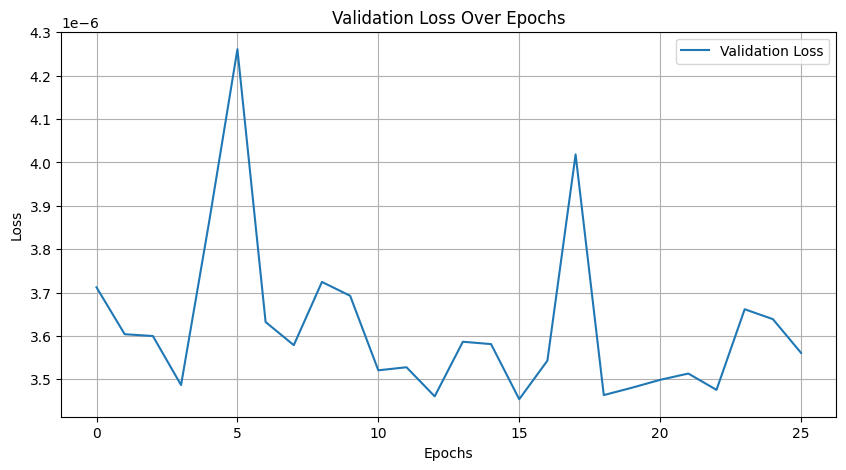

In [16]:
import matplotlib.pyplot as plt

def distillation_loss(student_logits, teacher_logits, T):
    teacher_probs = nn.functional.softmax(teacher_logits / T, dim=-1).to(device)
    student_log_probs = nn.functional.log_softmax(student_logits / T, dim=-1).to(device)
    distillation = nn.functional.kl_div(student_log_probs, teacher_probs, reduction='sum') * (T * T) / student_logits.shape[0]
    return distillation

optimizer = Adam(student_model.parameters(), lr=2e-5)
T = 2

def evaluate_model(dataloader, student_model, teacher_model, device, T):
    student_model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            teacher_outputs = teacher_model(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
            teacher_logits = teacher_outputs.logits
            features = teacher_outputs.hidden_states[-1][:, 0, :]  # [CLS] token's representation

            student_logits = student_model(features)

            loss = distillation_loss(student_logits, teacher_logits, T)
            total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    return avg_loss

# Early stopping parameters
patience = 10
best_loss = float('inf')
patience_counter = 0
losses = []  # List to store loss per epoch

for epoch in range(50):
    student_model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        with torch.no_grad():
            teacher_outputs = teacher_model(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
            teacher_logits = teacher_outputs.logits
            features = teacher_outputs.hidden_states[-1][:, 0, :]

        student_logits = student_model(features)
        loss = distillation_loss(student_logits, teacher_logits, T)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    validation_loss = evaluate_model(val_loader, student_model, teacher_model, device, T)
    losses.append(validation_loss)  # Log validation loss for plotting
    print(f'Epoch {epoch+1}, Validation Loss: {validation_loss}')

    if validation_loss < best_loss:
        best_loss = validation_loss
        patience_counter = 0
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print("Early stopping triggered")
        break

# Plotting the losses after training
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
T = 2

# Call the evaluate_model function with all required arguments
test_loss = evaluate_model(test_loader, student_model, teacher_model, device, T)
print(f"Test Loss: {test_loss}")


Test Loss: 4.512257874011993e-06


#Results comparison of Validation loss and  Test Loss

Both loss values are very low, suggesting that the model has learned to accurately predict or classify the data it was tasked with. Low losses generally indicate good model performance, assuming that the losses accurately reflect meaningful metrics of success (e.g., prediction error).


Parameters used are:

* **Tempratue (T) = 2**
* **Learning Rate (lr) = 2e-5**

#Random Hyperparameter Search for Model Optimization

This Python script performs hyperparameter tuning for a student model using a random search approach across specified ranges of learning rates, temperature values (T), and patience thresholds:

* **Random Sampling:** For each of the 20 trials, it randomly selects values for the learning rate (lr), temperature (T), and patience from predefined lists.

* **Model Training:** The student model is trained for up to 50 epochs with the sampled hyperparameters. During training, it computes the distillation loss using teacher model outputs and updates using backpropagation.

* **Validation and Early Stopping:** After each epoch, the model's performance is evaluated on a validation set. If the validation loss does not improve for a number of epochs specified by the patience setting, training is halted early to prevent overfitting.

* **Tracking Best Parameters:**  Across all trials, the script keeps track of the best set of parameters that resulted in the lowest validation loss, reporting them at the end.

In [18]:
import random
import numpy as np


num_samples = 20
best_loss = np.inf
best_params = {}

for _ in range(num_samples):
    lr = random.choice([1e-5, 2e-5, 3e-5])
    T = random.choice([1, 2, 5])
    patience = random.choice([5, 10, 15])

    # Setup the model and optimizer with the sampled hyperparameters
    optimizer = Adam(student_model.parameters(), lr=lr)

    # Reset patience counter and best epoch loss for early stopping
    patience_counter = 0
    epoch_best_loss = np.inf

    for epoch in range(50):
        student_model.train()  # Ensure the model is in training mode
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            with torch.no_grad():
                teacher_outputs = teacher_model(input_ids=input_ids, attention_mask=attention_mask, output_hidden_states=True)
                teacher_logits = teacher_outputs.logits
                features = teacher_outputs.hidden_states[-1][:, 0, :]  # [CLS] token's representation

            student_logits = student_model(features)
            loss = distillation_loss(student_logits, teacher_logits, T)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate on the validation set after each epoch
        validation_loss = evaluate_model(val_loader, student_model, teacher_model, device, T)
        print(f'Epoch {epoch+1}, Validation Loss: {validation_loss}, LR: {lr}, T: {T}, Patience: {patience}')

        # Early stopping logic
        if validation_loss < epoch_best_loss:
            epoch_best_loss = validation_loss
            patience_counter = 0  # reset patience counter
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered")
            break  # Break out of the loop if patience counter has reached the limit

    # Tracking the best parameters across all random samples
    if epoch_best_loss < best_loss:
        best_loss = epoch_best_loss
        best_params = {'lr': lr, 'temperature': T, 'patience': patience}
        print(f"New best parameters found: LR={lr}, Temperature={T}, Patience={patience}, Loss={best_loss}")

print(f"Best parameters after random search: {best_params} with loss {best_loss}")


Epoch 1, Validation Loss: 3.5150183571709526e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 2, Validation Loss: 3.4111241499582925e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 3, Validation Loss: 3.4214721785651313e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 4, Validation Loss: 3.428094916873508e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 5, Validation Loss: 3.5009450382656523e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 6, Validation Loss: 3.459139002694024e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 7, Validation Loss: 3.4860438770718047e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 8, Validation Loss: 3.455413712395562e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 9, Validation Loss: 3.4794211387634277e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 10, Validation Loss: 3.433889812893338e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 11, Validation Loss: 3.443823920355903e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 12, Validation Loss: 3.443823920355903e-06, LR: 2e-05, T: 2, Patience: 15
Epoch 13, Validation Loss: 3.44423784150017

#Result Comparison:

**Best parameters after random search: {'lr': 2e-05, 'temperature': 5, 'patience': 15} with loss 3.259629011154175e-06**


The results from the random search indicate that we've found a highly effective set of hyperparameters for our student model, given the extremely low validation loss value reported (3.259629011154175e-06). Comparing this to the previously mentioned validation and test losses (which were 3.5609636041853164e-06 for validation and 4.512257874011993e-06 for test)

#Saving this Model

In [23]:
model_path = '/content/all_recipe.pth'
#torch.save(student_model.state_dict(), model_path)

# Saving model with metadata
torch.save({
    'model_state_dict': student_model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': best_loss,
    }, model_path)




#Checking the model by maching the Hyperparameters

In [24]:
model = StudentModel(input_size, hidden_size, num_classes)

#model.load_state_dict(torch.load('/content/all_recipe.pth'))


# Loading model with metadata
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
print("Loaded model loss:", checkpoint['loss'])


Loaded model loss: 3.259629011154175e-06


#Sample Questions:
Can you guess how many calories are in Big Al's K.C. Bar-B-Q Sauce?

What's the rating of Orzo and Wild Rice Salad?

What do you need to make Chicago Hot Dog-Style Salmon, and how long will it take?

How many servings does Lobster Casserole yield?

What's the rating of Banh Bao?

Can you guess how many calories are in Vermont Maple Stout Baked Beans?

What is the nutritional content of Aunt Tootie's Pineapple Pie?

What's the total cooking time for Cookson Stew?

What are the ingredients needed for Lobster Casserole?

In [27]:
def find_closest_title(query, choices, limit=1):
    results = process.extract(query, choices, limit=limit)
    if results:
        # Debug print to check what's being matched
        print(f"Best match for '{query}' is '{results[0][0]}' with score {results[0][1]}")
        return results[0][0]  # Return the title with the highest match score
    return None


def answer_query(query, df):
    #print(f"Received query: '{query}'")
    title_guess = query.split(' for ')[-1].split('?')[0].strip()
    #print(f"Extracted title guess: '{title_guess}'")

    # Use fuzzy matching to find the closest title in the DataFrame
    title = find_closest_title(title_guess, df['basic_info.title'].tolist())
    if title:
        recipe = df[df['basic_info.title'].str.contains(title, case=False)].iloc[0]
        if 'ingredients' in query.lower():
            return f"The ingredients needed for {title} are {recipe['ingridients']}."
        elif 'prepare time' in query.lower() or 'how long will it take' in query.lower():
            return f"It takes {recipe['prep_data.total_time:']} to prepare {title}."
        elif 'nutritional content' in query.lower() or 'how many calories' in query.lower():
            return f"The nutritional content of {title} includes {recipe['nutritions.calories']} calories, {recipe['nutritions.fat']} fat, {recipe['nutritions.carbs']} carbs, and {recipe['nutritions.protein']} protein."
        elif 'who created' in query.lower():
            return f"The recipe {title} was created by {recipe['basic_info.recipe_by']}."
        elif 'servings' in query.lower():
            return f"{title} yields {recipe['prep_data.servings:']}."
        elif 'total cooking time' in query.lower():
            return f"The total cooking time for {title} is {recipe['prep_data.cook_time:']}."
        elif 'rating' in query.lower():
            return f"The rating of {title} is {recipe['basic_info.rating']} with {recipe['basic_info.rating_count']} ratings."
        elif 'reviews' in query.lower():
            return f"{title} has {recipe['basic_info.reviews']} reviews."
        else:
            return "I'm sorry, I can't understand the question."
    else:
        return "Recipe not found. Please check the recipe title or ask about another recipe."

# This function needs to be part of your interactive session or command line interface
def interactive_query_session():
    print("Hello! Ask me any question about recipes. Type 'exit' to end.")
    while True:
        query = input("What would you like to know? ")
        if query.lower() == 'exit':
            print("Goodbye!")
            break
        response = answer_query(query, df)
        print(response)

In [28]:
# Start the interactive session
interactive_query_session()

Hello! Ask me any question about recipes. Type 'exit' to end.
What would you like to know? what are the ingridients required for cowboy Caviar
Best match for 'cowboy Caviar' is 'Cowboy Caviar' with score 100
I'm sorry, I can't understand the question.
What would you like to know? what are the ingredients required for cowboy caviar?
Best match for 'cowboy caviar' is 'Cowboy Caviar' with score 100
The ingredients needed for Cowboy Caviar are ['1 (15.5 ounce) can black beans, drained', '1 (15.5 ounce) can black-eyed peas, drained', '1 (14.5 ounce) can diced tomatoes, drained', '2 cups frozen corn kernels, thawed', '½ medium onion, diced', '¼ medium green bell pepper, finely chopped', '½ cup chopped pickled jalapeno peppers', '½ teaspoon garlic salt', '1 cup Italian salad dressing', '¾ cup chopped cilantro'].
What would you like to know? what is the nutritional content of chocolate pie?
Best match for 'what is the nutritional content of chocolate pie' is 'Single Crust Peach Pie' with score